## 전처리

In [2]:
#코랩에서 작성할 경우 아래 주석을 해제해주세요
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124950 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


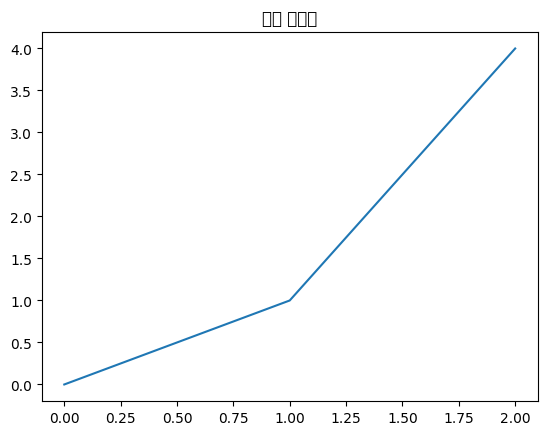

In [3]:
!apt-get update -qq
!apt-get install -qq fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 나눔 폰트 경로 가져오기
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 폰트 설정
font_prop = fm.FontProperties(fname=font_path)
mpl.rc("font", family=font_prop.get_name())

# 한글 폰트 적용 확인
plt.plot([0, 1, 2], [0, 1, 4])
plt.title("한글 테스트")  # 한글 제목 정상 출력 확인
plt.show()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from concurrent.futures import ThreadPoolExecutor
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

In [ ]:
file_list = [
    "seoul_purpose_admdong4_in_20241124.csv",
    "seoul_purpose_admdong4_in_20241125.csv",
    "seoul_purpose_admdong4_in_20241126.csv",
    "seoul_purpose_admdong4_in_20241127.csv",
    "seoul_purpose_admdong4_in_20241128.csv",
    "seoul_purpose_admdong4_in_20241129.csv",
    "seoul_purpose_admdong4_in_20241130.csv",
]

df_list = [pd.read_csv(file, encoding="utf-8") for file in file_list]
df_combined = pd.concat(df_list, ignore_index=True)
df_shuffled = df_combined.sample(frac=1).reset_index(drop=True)

In [ ]:
len(df_shuffled)

40368129

In [ ]:
filtered_df = df_shuffled[
    df_shuffled["o_admdong_cd"].astype(str).str.startswith("1")
    & df_shuffled["d_admdong_cd"].astype(str).str.startswith("1")
]

In [ ]:
len(filtered_df)

12920345

In [ ]:
filtered_df.to_csv("filtered_df.csv", encoding="utf-8", index=False)

In [ ]:
place = pd.read_excel("행정구역별_위경도_좌표.xlsx")
place = place[place["시도"] == "서울특별시"]

In [ ]:
place["주소"] = (
    place["시도"].fillna("").str.strip()
    + " "
    + place["시군구"].fillna("").str.strip()
    + " "
    + place["읍면동/구"].fillna("").str.strip()
    + " "
    + place["읍/면/리/동"].fillna("").str.strip()
).str.strip()

In [ ]:
place = place[["주소", "위도", "경도"]]
print(place["주소"].nunique())
place.head()

832


,주소,위도,경도
0,서울특별시,37.566610,126.978388
1,서울특별시 강동구,37.530126,127.123771
2,서울특별시 강동구 천호동,37.545016,127.136807
3,서울특별시 강동구 성내동,37.530442,127.122425
4,서울특별시 강동구 암사동,37.551508,127.132663


In [ ]:
filtered_df = pd.read_csv("filtered_df.csv", encoding="utf-8")

In [ ]:
hangjung = pd.read_csv("행정동.csv", encoding="cp949")

In [ ]:
hangjung = hangjung[["FULL_NM", "ADMI_CD"]]

In [ ]:
final_df = filtered_df.merge(
    hangjung, how="left", left_on="o_admdong_cd", right_on="ADMI_CD"
)

In [ ]:
final_df["o_admdong_cd"] = final_df["FULL_NM"]
final_df.head(3)

,o_admdong_cd,d_admdong_cd,st_time_cd,fns_time_cd,move_dist,move_time,0010_cnt,2030_cnt,4050_cnt,60plus_cnt,total_cnt,etl_ymd,FULL_NM,ADMI_CD
0,서울특별시 구로구 오류2동,11680521,840,940,17026.0,53.0,0.0,2.22,0.00,0.0,2.22,20241128,서울특별시 구로구 오류2동,11530780
1,서울특별시 양천구 신월3동,11500605,800,820,4186.0,27.0,0.0,0.00,4.14,0.0,4.14,20241129,서울특별시 양천구 신월3동,11470580
2,서울특별시 성북구 종암동,11680660,14,16,12063.0,80.0,0.0,2.85,0.00,0.0,2.85,20241125,서울특별시 성북구 종암동,11290705


In [ ]:
final_df = final_df.merge(
    hangjung, how="left", left_on="d_admdong_cd", right_on="ADMI_CD"
)

final_df["d_admdong_cd"] = final_df["FULL_NM_y"]

In [ ]:
final_df = final_df[
    [
        "o_admdong_cd",
        "d_admdong_cd",
        "st_time_cd",
        "fns_time_cd",
        "move_dist",
        "move_time",
        "0010_cnt",
        "2030_cnt",
        "4050_cnt",
        "60plus_cnt",
        "total_cnt",
        "etl_ymd",
    ]
]

In [ ]:
final_df

,o_admdong_cd,d_admdong_cd,st_time_cd,fns_time_cd,move_dist,move_time,0010_cnt,2030_cnt,4050_cnt,60plus_cnt,total_cnt,etl_ymd
0,서울특별시 구로구 오류2동,서울특별시 강남구 논현1동,840,940,17026.0,53.0,0.0,2.22,0.00,0.00,2.22,20241128
1,서울특별시 양천구 신월3동,서울특별시 강서구 가양3동,800,820,4186.0,27.0,0.0,0.00,4.14,0.00,4.14,20241129
2,서울특별시 성북구 종암동,서울특별시 강남구 개포1동,14,16,12063.0,80.0,0.0,2.85,0.00,0.00,2.85,20241125
3,서울특별시 마포구 망원1동,서울특별시 양천구 목3동,820,920,4114.0,48.0,0.0,0.00,0.00,3.88,3.88,20241124
4,서울특별시 송파구 오륜동,서울특별시 서초구 서초3동,12,15,9956.0,174.0,0.0,0.00,0.00,2.58,2.58,20241127
...,...,...,...,...,...,...,...,...,...,...,...,...
12920340,서울특별시 노원구 공릉2동,서울특별시 강남구 청담동,820,940,12080.0,74.0,0.0,2.58,10.84,0.00,13.42,20241127
12920341,서울특별시 강서구 공항동,서울특별시 강서구 화곡4동,11,11,5075.0,5.0,0.0,8.46,10.24,14.66,33.36,20241128
12920342,서울특별시 송파구 거여1동,서울특별시 강남구 역삼1동,720,820,9366.0,61.0,0.0,2.45,2.28,0.00,4.73,20241127
12920343,서울특별시 성동구 성수2가1동,서울특별시 광진구 자양1동,16,1720,2304.0,47.0,0.0,0.00,3.70,0.00,3.70,20241125


In [ ]:
from concurrent.futures import ThreadPoolExecutor
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

# Geolocator 설정
geolocator = Nominatim(user_agent="geo_api", timeout=10)


# 행정동 코드 -> 주소 변환 함수 (스레드 안전)
def get_lat_lon(admdong_name):
    """행정동 명을 입력하면 위도, 경도를 반환하는 함수"""
    try:
        location = geolocator.geocode(f"{admdong_name}")
        if location:
            return location.latitude, location.longitude
    except GeocoderTimedOut:
        time.sleep(1)  # 요청 시간 초과 시 재시도
        return get_lat_lon(admdong_name)
    return None, None


if final_df is not None:
    # 좌표 저장을 위한 새로운 열 추가
    final_df["위도_o"] = None
    final_df["경도_o"] = None
    final_df["위도_d"] = None
    final_df["경도_d"] = None

    # 중복 요청 방지를 위한 캐싱 딕셔너리
    coord_cache = {}

    # 행정동 좌표 변환 병렬 처리 함수
    def process_row(idx, o_admdong, d_admdong):
        result = {}
        # o_admdong 처리
        if pd.notna(o_admdong):
            if o_admdong in coord_cache:
                result["위도_o"], result["경도_o"] = coord_cache[o_admdong]
            else:
                lat, lon = get_lat_lon(o_admdong)
                result["위도_o"], result["경도_o"] = lat, lon
                coord_cache[o_admdong] = (lat, lon)

        # d_admdong 처리
        if pd.notna(d_admdong):
            if d_admdong in coord_cache:
                result["위도_d"], result["경도_d"] = coord_cache[d_admdong]
            else:
                lat, lon = get_lat_lon(d_admdong)
                result["위도_d"], result["경도_d"] = lat, lon
                coord_cache[d_admdong] = (lat, lon)

        return idx, result

    # 병렬 처리 실행
    with ThreadPoolExecutor(max_workers=4) as executor:
        future_to_idx = {
            executor.submit(
                process_row, idx, row["o_admdong_cd"], row["d_admdong_cd"]
            ): idx
            for idx, row in final_df.iterrows()
        }

        for future in future_to_idx:
            idx, result = future.result()
            for col, value in result.items():
                final_df.at[idx, col] = value

In [ ]:
final_df.to_csv("final_df.csv", encoding="utf-8", index=False)

## 분석

In [5]:
file_path1 = '/content/drive/MyDrive/DSL-1/자치구별 이동 데이터/final_df.csv'

In [6]:
final_df = pd.read_csv(file_path1, encoding="utf-8")
final_df["OD"] = list(zip(final_df["o_admdong_cd"], final_df["d_admdong_cd"]))

In [7]:
!sudo apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib
!apt-get update -qq


import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치한 한글 폰트 경로 가져오기
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# matplotlib에 한글 폰트 적용
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [8]:
target_districts = {"서초구", "강남구", "송파구"}

# 필터링 적용: OD 튜플의 어느 한 요소라도 특정 구에 포함되면 선택
final_df = final_df[
    final_df["OD"].apply(
        lambda od: any(loc.split(" ")[1] in target_districts for loc in od)
    )
]

In [9]:
meaningful_df = final_df[final_df["o_admdong_cd"] != final_df["d_admdong_cd"]]

# 출발지-도착지(OD) 튜플 생성 후 빈도 계산
od_counts = meaningful_df["OD"].value_counts().reset_index()
od_counts.columns = ["OD", "빈도수"]

In [10]:
long_distance = final_df[final_df["move_dist"] >= 5000]

meaningful_df = long_distance[
    long_distance["o_admdong_cd"] != long_distance["d_admdong_cd"]
]

# 출발지-도착지(OD) 튜플 생성 후 빈도 계산
od_counts = meaningful_df["OD"].value_counts().reset_index()
od_counts.columns = ["OD", "빈도수"]

<ipython-input-11-37f69e5c66a1>:29: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  plt.savefig("od_counts_top50.png", dpi=1200, bbox_inches="tight")
<ipython-input-11-37f69e5c66a1>:29: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  plt.savefig("od_counts_top50.png", dpi=1200, bbox_inches="tight")
<ipython-input-11-37f69e5c66a1>:29: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  plt.savefig("od_counts_top50.png", dpi=1200, bbox_inches="tight")
<ipython-input-11-37f69e5c66a1>:29: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.savefig("od_counts_top50.png", dpi=1200, bbox_inches="tight")
<ipython-input-11-37f69e5c66a1>:29: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.savefig("od_counts_top50.png", dpi=1200, bbox_inches="tight")
<ipython-input-11-37f69e5c66a1>:29: UserWarning: Glyph

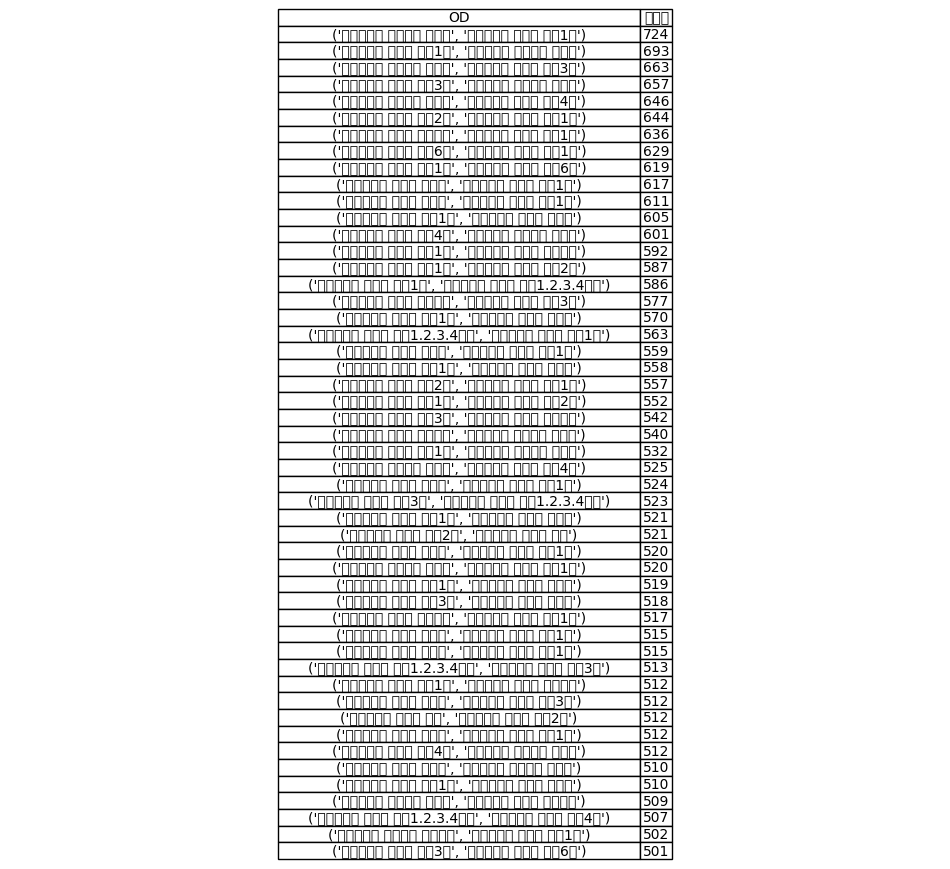

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc("font", family="NanumGothic")     #코랩이라 한글 다른거로
# 상위 50개 데이터 선택
top_50_od_counts = od_counts.head(50)

# 플롯 크기 설정
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis("tight")
ax.axis("off")

# 테이블 그리기
table = ax.table(
    cellText=top_50_od_counts.values,
    colLabels=top_50_od_counts.columns,
    cellLoc="center",
    loc="center",
)

# 테이블 스타일 조정
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(
    [i for i in range(len(top_50_od_counts.columns))]
)  # 컬럼 너비 자동 조정

# 이미지 저장
plt.savefig("od_counts_top50.png", dpi=1200, bbox_inches="tight")
plt.show()

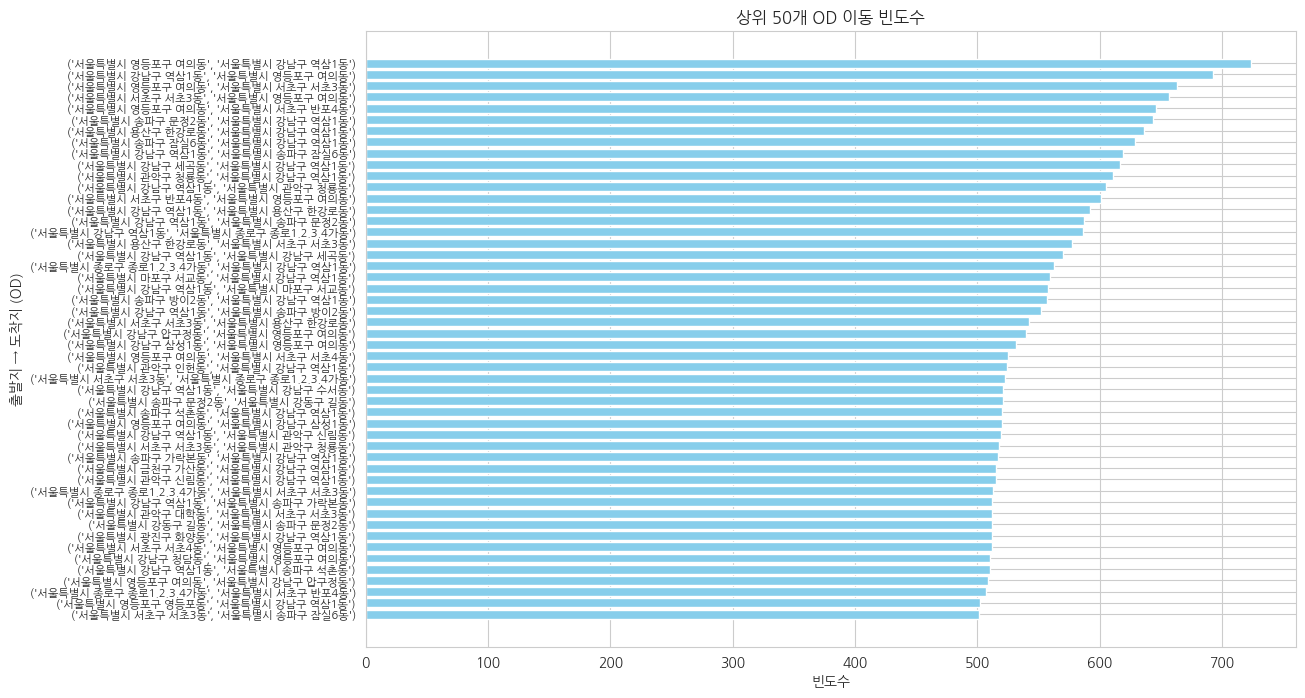

In [ ]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic")
# 상위 50개 OD 데이터 선택
top_50_od_counts = od_counts.head(50)

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 막대 그래프 그리기
plt.barh(top_50_od_counts["OD"].astype(str), top_50_od_counts["빈도수"], color="skyblue")

# 그래프 제목 & 라벨 설정
plt.xlabel("빈도수")
plt.ylabel("출발지 → 도착지 (OD)")
plt.title("상위 50개 OD 이동 빈도수")

# y축 글자 크기 조정 (글자가 잘리면 조정)
plt.yticks(fontsize=8)

# 그래프 보여주기
plt.gca().invert_yaxis()  # 빈도수가 높은 순으로 정렬
plt.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

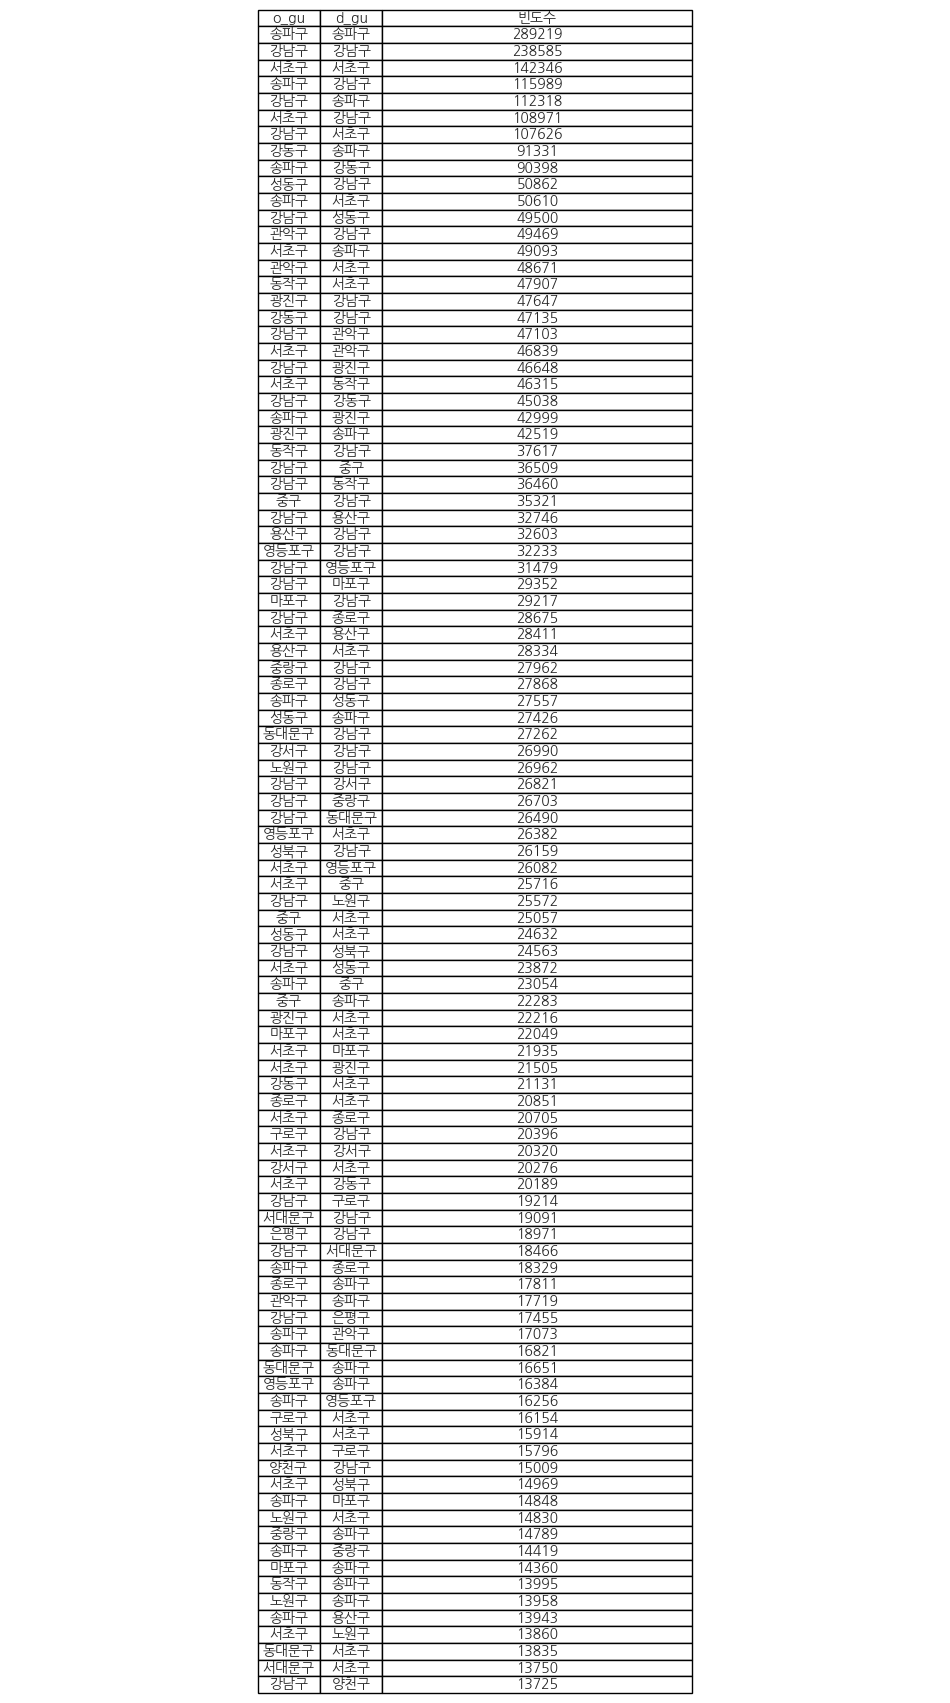

In [ ]:
!sudo apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib
!apt-get update -qq


import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치한 한글 폰트 경로 가져오기
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# matplotlib에 한글 폰트 적용
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

import matplotlib.pyplot as plt

# 자치구 이름만 추출
final_df['o_gu'] = final_df['o_admdong_cd'].apply(lambda x: x.split(" ")[1])
final_df['d_gu'] = final_df['d_admdong_cd'].apply(lambda x: x.split(" ")[1])

# 자치구 단위로 OD (출발지 → 도착지) 빈도수 계산
od_counts_gu = final_df.groupby(['o_gu', 'd_gu']).size().reset_index(name="빈도수")

# 상위 50개 빈도수 높은 자치구 단위 OD 추출
top_50_gu_od_counts = od_counts_gu.nlargest(100, '빈도수')

# 상위 50개 빈도수 데이터를 CSV로 저장
top_50_gu_od_counts.to_csv("top_50_gu_od_counts.csv", index=False, encoding='utf-8-sig')  # 한글 인코딩 문제 방지

# 테이블 스타일로 출력
plt.figure(figsize=(12, 8))

# 테이블 생성
plt.axis("tight")
plt.axis("off")
table = plt.table(cellText=top_50_gu_od_counts.values, colLabels=top_50_gu_od_counts.columns, loc="center", cellLoc="center")

# 스타일 설정
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1])  # 'o_gu', 'd_gu' 컬럼 너비 자동 조정

# 이미지 저장 및 출력
plt.savefig("od_counts_gu_top50.png", dpi=1200, bbox_inches="tight")
plt.show()

In [ ]:
import pandas as pd

# 자치구 이름 한글에서 영어로 매핑
gu_mapping = {
    "송파구": "Songpa-gu",
    "강남구": "Gangnam-gu",
    "서초구": "Seocho-gu",
    "마포구": "Mapo-gu",
    "용산구": "Yongsan-gu",
    "광진구": "Gwangjin-gu",
    "구로구": "Guro-gu",
    "영등포구": "Yeongdeungpo-gu",
    "노원구": "Nowon-gu",
    "동대문구": "Dongdaemun-gu",
    "강서구": "Gangseo-gu",
    "강동구": "Gangdong-gu",
    "종로구": "Jongno-gu",
    "중구": "Jung-gu",
    "양천구": "Yangcheon-gu",
    "도봉구": "Dobong-gu",
    "금천구": "Geumcheon-gu",
    "동작구": "Dongjak-gu",
    "관악구": "Gwanak-gu",
    "성북구": "Seongbuk-gu",
    "서대문구": "Seodaemun-gu",
    "송파구": "Songpa-gu",
    "청담구": "Cheongdam-gu",
    "천호구": "Cheonho-gu",
    "서초구": "Seocho-gu",
    "성동구": "Seongdong-gu",
    "중랑구": "Jungnang-gu",
    "은평구": "Eungpyeong-gu"
}

# 데이터 불러오기
top_50_gu_od_counts = pd.read_csv('/content/top_50_gu_od_counts.csv')

# 자치구 이름 한글에서 영어로 변환
top_50_gu_od_counts['o_gu'] = top_50_gu_od_counts['o_gu'].map(gu_mapping).fillna(top_50_gu_od_counts['o_gu'])
top_50_gu_od_counts['d_gu'] = top_50_gu_od_counts['d_gu'].map(gu_mapping).fillna(top_50_gu_od_counts['d_gu'])

# 결과 출력
print(top_50_gu_od_counts.head())

         o_gu        d_gu     빈도수
0   Songpa-gu   Songpa-gu  289219
1  Gangnam-gu  Gangnam-gu  238585
2   Seocho-gu   Seocho-gu  142346
3   Songpa-gu  Gangnam-gu  115989
4  Gangnam-gu   Songpa-gu  112318


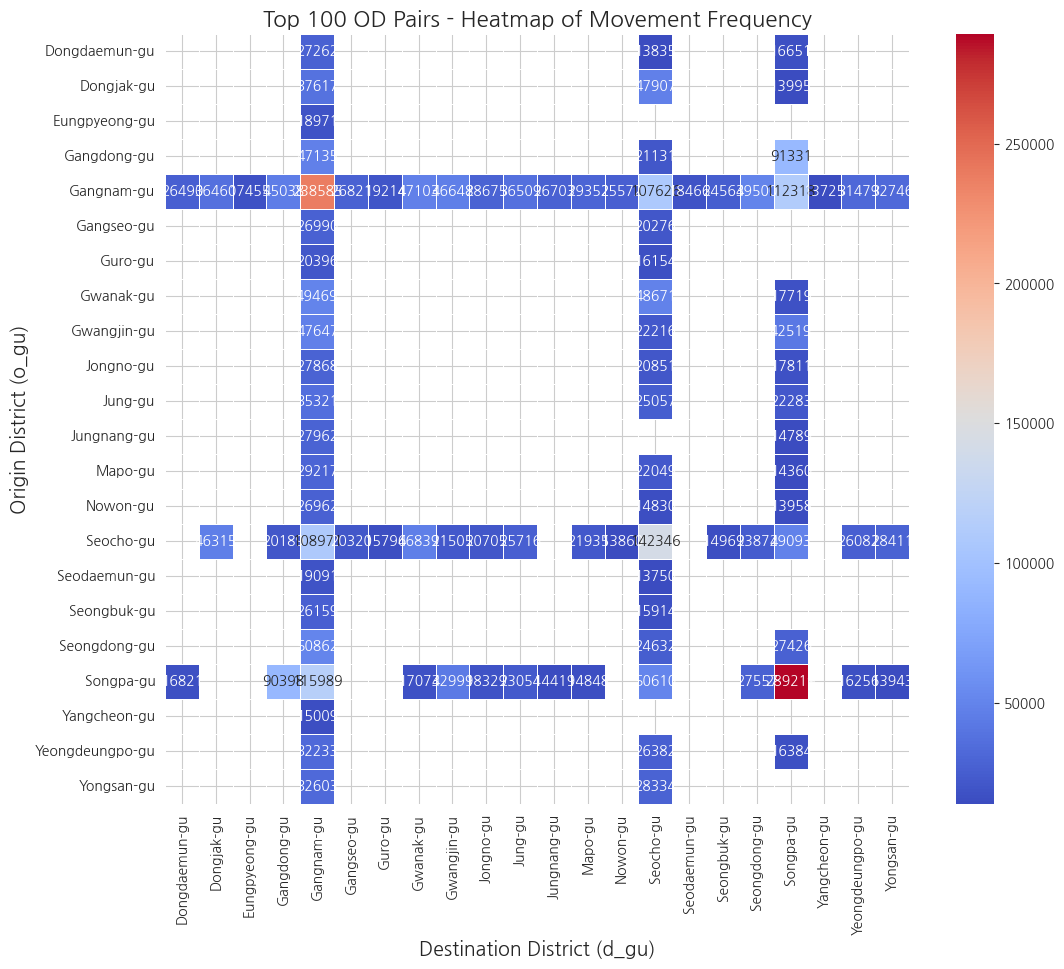

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 출발지(o_gu)와 도착지(d_gu)별 빈도수를 pivot table로 변환
od_pivot = top_50_gu_od_counts.pivot(index="o_gu", columns="d_gu", values="빈도수")

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(od_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)

# 타이틀 및 레이블 설정
plt.title("Top 100 OD Pairs - Heatmap of Movement Frequency", fontsize=16)
plt.xlabel("Destination District (d_gu)", fontsize=14)
plt.ylabel("Origin District (o_gu)", fontsize=14)

# 그래프 출력
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 전체 OD 데이터에서 출발지-도착지별 이동 횟수 집계
od_counts = df.groupby(["o_gu", "d_gu"]).size().reset_index(name="빈도수")

# 출발지(o_gu)와 도착지(d_gu)별 빈도수를 pivot table로 변환
od_pivot = od_counts.pivot(index="o_gu", columns="d_gu", values="빈도수")

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(od_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)

# 타이틀 및 레이블 설정
plt.title("OD Movement Frequency - Heatmap (Full Data)", fontsize=16)
plt.xlabel("Destination District (d_gu)", fontsize=14)
plt.ylabel("Origin District (o_gu)", fontsize=14)

# 그래프 출력
plt.show()

NameError: name 'df' is not defined

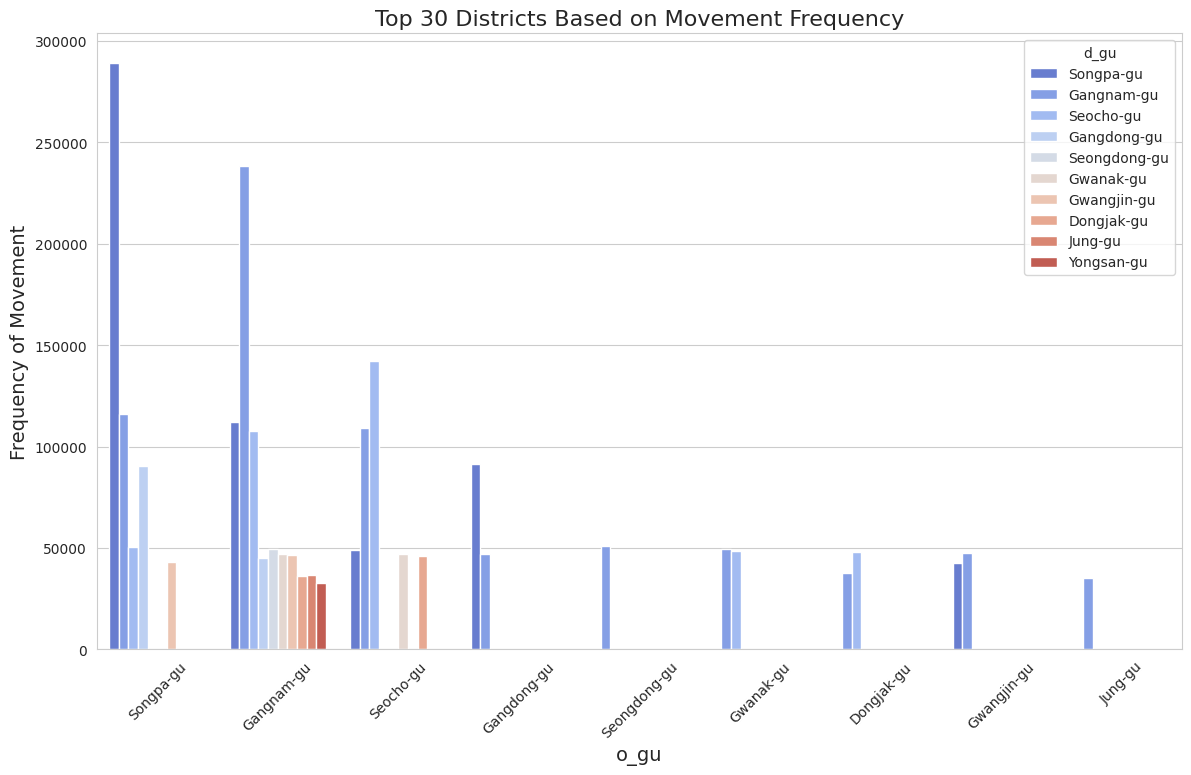

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 설정
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

# 상위 30개 자치구 단위의 OD 데이터 추출
top_30_gu_od_counts = top_50_gu_od_counts.nlargest(30, '빈도수')

# 막대그래프 시각화
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_30_gu_od_counts, x="o_gu", y="빈도수", hue="d_gu", palette="coolwarm"
)

# 레이블 및 타이틀 설정
plt.xlabel("o_gu", fontsize=14)
plt.ylabel("Frequency of Movement", fontsize=14)
plt.title("Top 30 Districts Based on Movement Frequency", fontsize=16)

# X축 레이블 회전
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

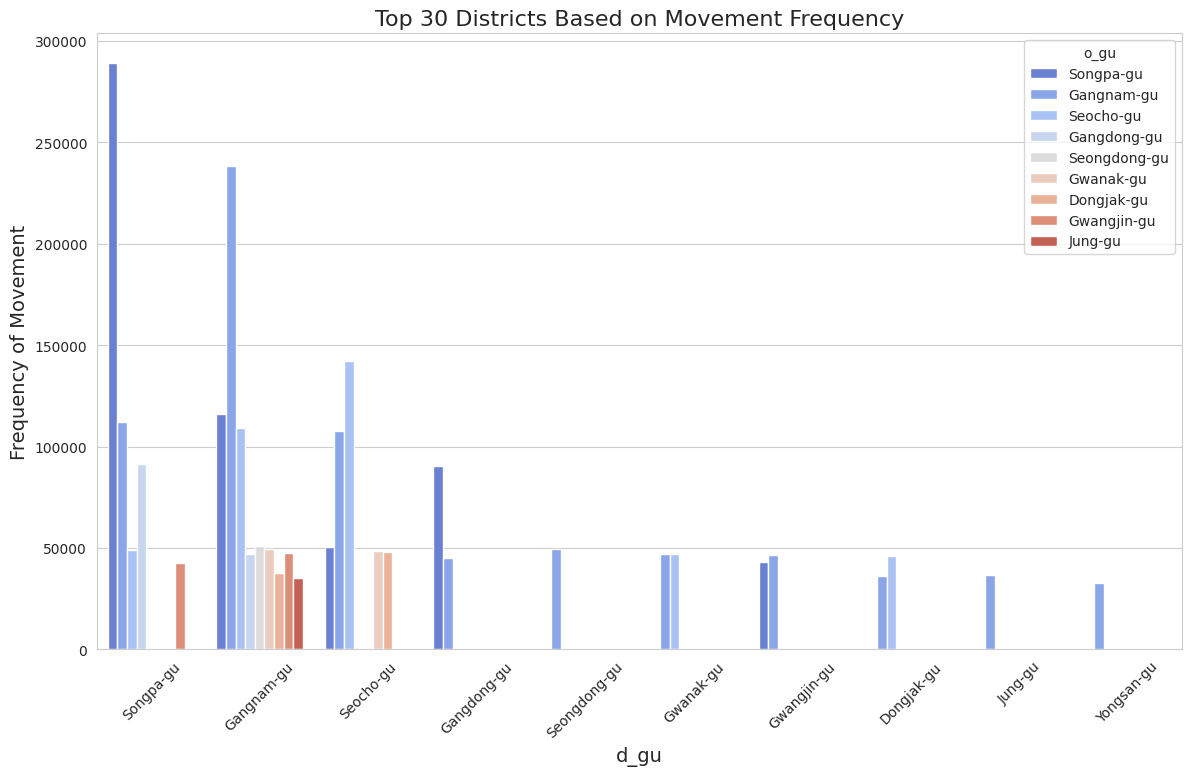

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 설정
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

# 상위 30개 자치구 단위의 OD 데이터 추출
top_30_gu_od_counts = top_50_gu_od_counts.nlargest(30, '빈도수')

# 막대그래프 시각화
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_30_gu_od_counts, x="d_gu", y="빈도수", hue="o_gu", palette="coolwarm"
)

# 레이블 및 타이틀 설정
plt.xlabel("d_gu", fontsize=14)
plt.ylabel("Frequency of Movement", fontsize=14)
plt.title("Top 30 Districts Based on Movement Frequency", fontsize=16)

# X축 레이블 회전
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

In [12]:
# st_time_cd 열을 4자리 형식으로 변환
final_df['st_time_cd'] = final_df['st_time_cd'].apply(
    lambda x: f"0{int(x)}00" if len(str(int(x))) == 1 else f"{int(x)}00" if len(str(int(x))) == 2 else f"0{int(x)}" if len(str(int(x))) == 3 else str(int(x))  # 조건에 맞게 변환
)

# 변환된 'st_time_cd' 열 확인 (변환 후 일부 값 출력)
print(final_df['st_time_cd'].head(20))  # 첫 20개의 'st_time_cd' 값 출력

0     0840
2     1400
4     1200
5     1940
6     0900
7     1200
9     1600
13    0800
15    1940
19    2200
20    2000
25    1940
26    2000
28    1200
30    2100
43    1900
50    0820
53    2100
58    1800
59    1200
Name: st_time_cd, dtype: object


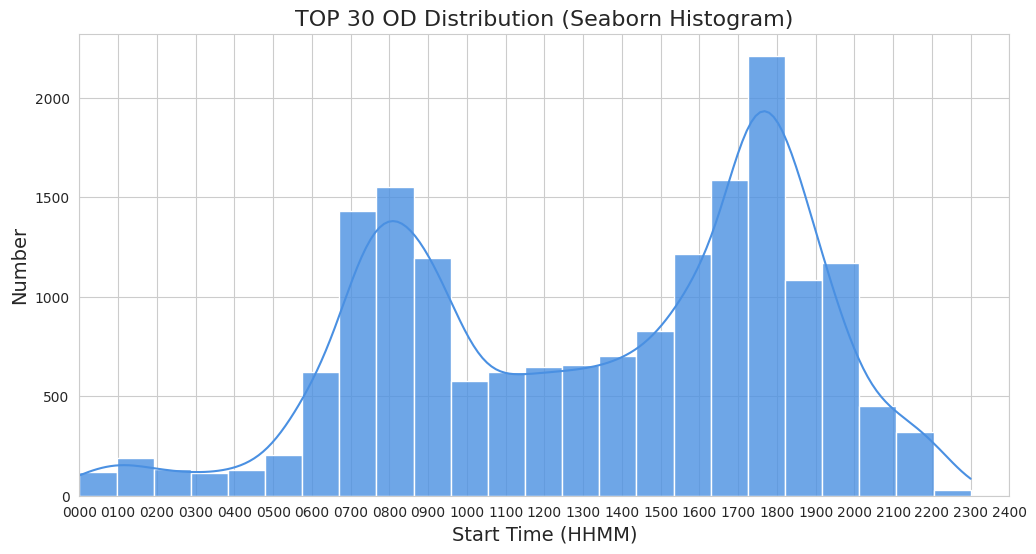

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# st_time_cd를 정수형으로 변환 (히스토그램을 위해)
final_df['st_time_cd'] = final_df['st_time_cd'].astype(int)

# top 30 OD 필터링
final_df_top30 = final_df[final_df["OD"].isin(od_counts.head(30)["OD"])]

# 스타일 적용
sns.set_style("whitegrid")  # 배경 스타일 (darkgrid, whitegrid, dark 등 선택 가능)
sns.set_palette("coolwarm")  # 색상 테마 지정

# 히스토그램 시각화
plt.figure(figsize=(12, 6))
sns.histplot(
    final_df_top30, x="st_time_cd", bins=24, kde=True, color="#4A90E2", alpha=0.8
)

# 레이블 및 타이틀 설정
plt.xlabel("Start Time (HHMM)", fontsize=14)
plt.ylabel("Number", fontsize=14)
plt.title("TOP 30 OD Distribution (Seaborn Histogram)", fontsize=16)

# X축 범위 설정: 0시부터 24시까지
plt.xlim(0, 2400)

# X축 레이블 설정: 0시부터 24시까지, 100 단위 간격
plt.xticks(ticks=range(0, 2401, 100), labels=[f"{i:02d}00" for i in range(0, 25)])

# 그래프 출력
plt.show()

## TOP 30 주말

In [14]:
final_df["etl_ymd"] = pd.to_datetime(final_df["etl_ymd"].astype(str), format="%Y%m%d")

# 요일 변환 (영어 요일: Monday, Tuesday ...)
final_df["weekday"] = final_df["etl_ymd"].dt.day_name()

In [15]:
weekend_df = final_df[final_df["weekday"].isin(["Saturday", "Sunday"])]

In [16]:
long_distance_weekend = weekend_df[weekend_df["move_dist"] >= 5000]

meaningful_df = long_distance_weekend[
    long_distance_weekend["o_admdong_cd"] != long_distance_weekend["d_admdong_cd"]
]

# 출발지-도착지(OD) 튜플 생성 후 빈도 계산
weekend_od_counts = meaningful_df["OD"].value_counts().reset_index()
weekend_od_counts.columns = ["OD", "빈도수"]

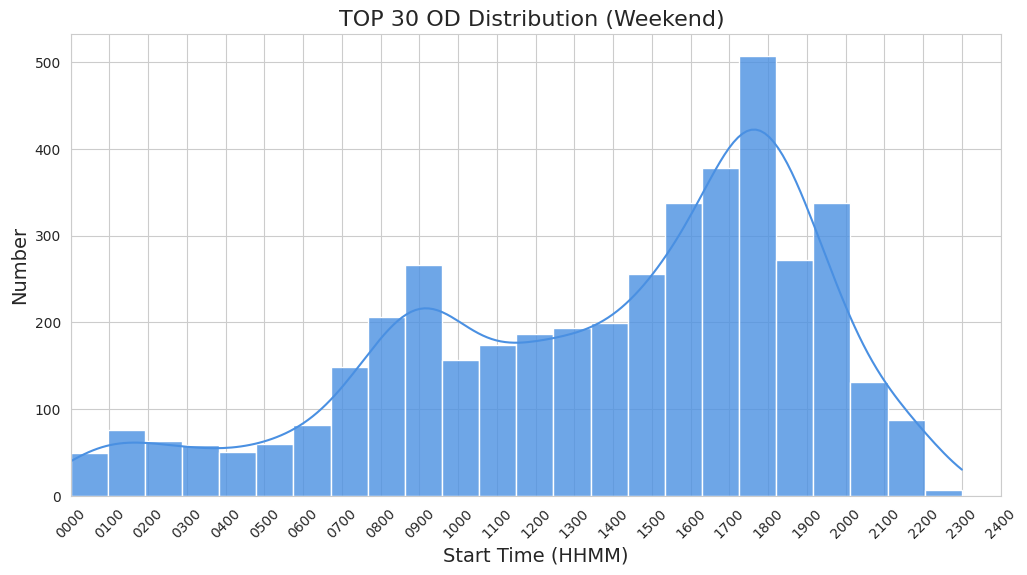

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

weekend_final_df_top30 = long_distance_weekend[
    long_distance_weekend["OD"].isin(weekend_od_counts.head(30)["OD"])
]

# 스타일 적용
sns.set_style("whitegrid")  # 배경 스타일 (darkgrid, whitegrid, dark 등 선택 가능)
sns.set_palette("coolwarm")  # 색상 테마 지정

# 히스토그램 시각화
plt.figure(figsize=(12, 6))
sns.histplot(
    weekend_final_df_top30, x="st_time_cd", bins=24, kde=True, color="#4A90E2", alpha=0.8
)


# 레이블 및 타이틀 설정
plt.xlabel("Start Time (HHMM)", fontsize=14)
plt.ylabel("Number", fontsize=14)
plt.title("TOP 30 OD Distribution (Weekend) ", fontsize=16)

# X축 범위 설정: 0시부터 24시까지
plt.xlim(0, 2400)

# X축 레이블 설정: 0시부터 24시까지, 100 단위 간격
plt.xticks(ticks=range(0, 2401, 100), labels=[f"{i:02d}00" for i in range(0, 25)])

# X축 레이블 회전
plt.xticks(rotation=45)


# 그래프 출력
plt.show()

## TOP 30 평일 분석

In [ ]:
weekday_df = final_df[~final_df["weekday"].isin(["Saturday", "Sunday"])]

In [ ]:
long_distance_weekday = weekday_df[weekday_df["move_dist"] >= 5000]

meaningful_df_weekday = long_distance_weekend[
    long_distance_weekend["o_admdong_cd"] != long_distance_weekend["d_admdong_cd"]
]

# 출발지-도착지(OD) 튜플 생성 후 빈도 계산
weekday_od_counts = meaningful_df_weekday["OD"].value_counts().reset_index()
weekday_od_counts.columns = ["OD", "빈도수"]

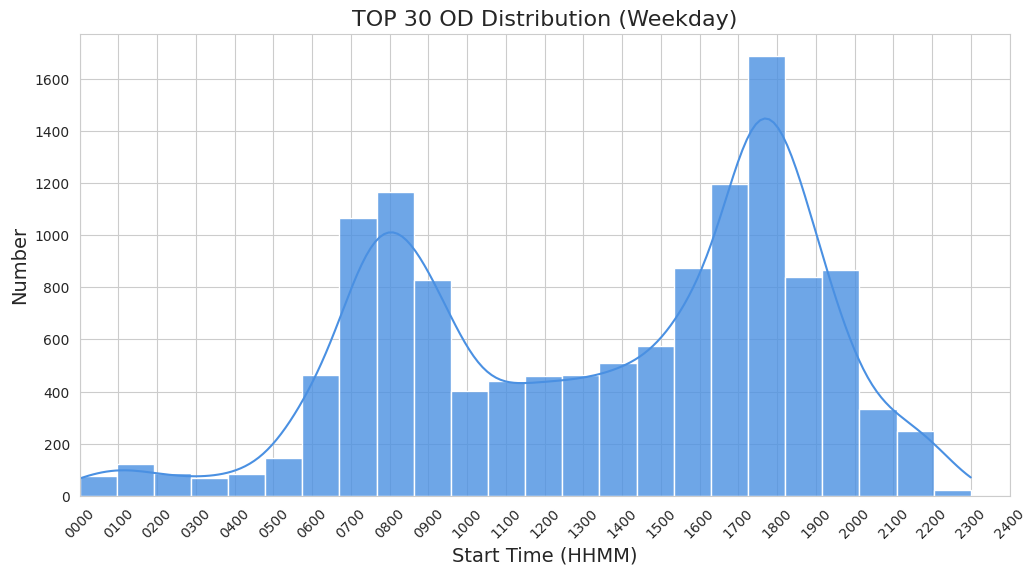

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

weekday_final_df_top30 = long_distance_weekday[
    long_distance_weekday["OD"].isin(weekday_od_counts.head(30)["OD"])
]

# 스타일 적용
sns.set_style("whitegrid")  # 배경 스타일 (darkgrid, whitegrid, dark 등 선택 가능)
sns.set_palette("coolwarm")  # 색상 테마 지정

# 히스토그램 시각화
plt.figure(figsize=(12, 6))
sns.histplot(
    weekday_final_df_top30, x="st_time_cd", bins=24, kde=True, color="#4A90E2", alpha=0.8
)

# 레이블 및 타이틀 설정
plt.xlabel("Start Time (HHMM)", fontsize=14)
plt.ylabel("Number", fontsize=14)
plt.title("TOP 30 OD Distribution (Weekday)", fontsize=16)

# X축 범위 설정: 0시부터 24시까지
plt.xlim(0, 2400)

# X축 레이블 설정: 0시부터 24시까지, 100 단위 간격
plt.xticks(ticks=range(0, 2401, 100), labels=[f"{i:02d}00" for i in range(0, 25)])

# X축 레이블 회전
plt.xticks(rotation=45)

# 그래프 출력
plt.show()